In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

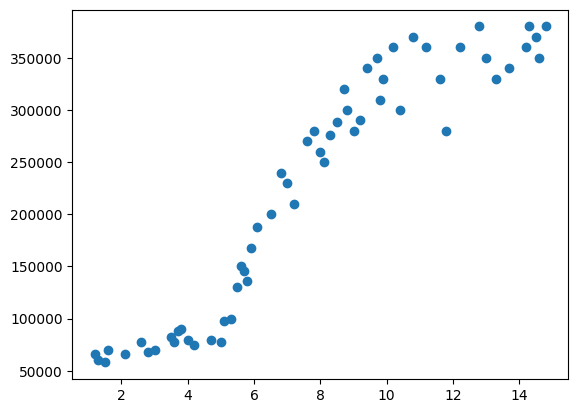

In [2]:
dataset = pd.read_csv("data/linear_regression_dataset_sample.csv")
X = dataset.iloc[:, 1].values.reshape(-1,1)
y = dataset.iloc[:,2].values

plt.scatter(X, y)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
X_train.shape, X_test.shape

((40, 1), (18, 1))

In [4]:
regressor = make_pipeline(PolynomialFeatures(6), LinearRegression())
regressor.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [5]:
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.9694916994320136
Accuracy: 96.94916994320137%


In [6]:
y1 = regressor.predict([[10.2]])
print('Predict : ', y1)

Predict :  [327806.58064966]


In [7]:
y_pred = regressor.predict(X_test)
print('Predict : ', y_pred)

Predict :  [306927.65346781 303950.67363342 327806.58064964 234670.42513823
  70119.30921118  73169.12972152 297337.45434039 328025.61892837
 153428.19406559 330311.16771117  79820.57485431  69253.27965494
 267467.89756673 325312.37220306 289849.60683313 326146.30685954
 316674.05552746  70597.71347899]


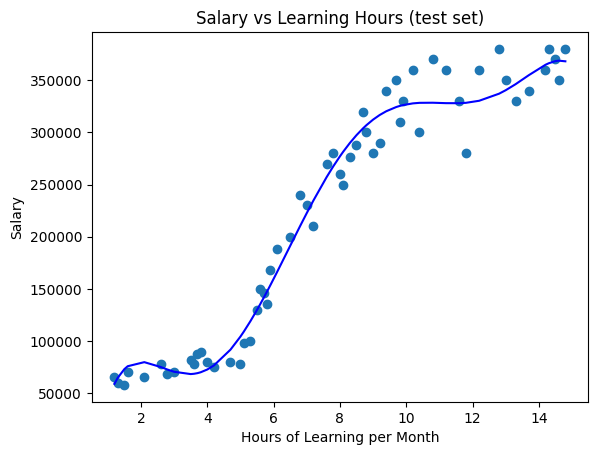

In [8]:
plt.scatter(X,y)
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Salary vs Learning Hours (test set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()